In [35]:
#Product recommendation system based on purchased product count using neural network

In [36]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten,Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam                                                                                
from sklearn.utils import shuffle
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
from matplotlib import pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:

user_purchase_count = pd.read_csv('/content/userid_purchaseid_count.csv')

user_purchase_count.head()   
user_purchase_count.dtypes

userId            int64
All_ProductId     int64
Purchase_Count    int64
dtype: object

In [38]:
user_purchase_count.userId = pd.Categorical(user_purchase_count.userId)
user_purchase_count['userId']=user_purchase_count.userId.cat.codes
user_purchase_count.Purchase_Count = pd.Categorical(user_purchase_count.Purchase_Count)
user_purchase_count['Purchase_Count']=user_purchase_count.Purchase_Count.cat.codes

user_purchase_count.All_ProductId = pd.Categorical(user_purchase_count.All_ProductId)
user_purchase_count['All_ProductId']=user_purchase_count.All_ProductId.cat.codes



In [39]:
Purchase_Count=user_purchase_count['Purchase_Count'].values
Purchase_Count

array([ 1,  4, 14, ...,  5, 10,  1], dtype=int8)

In [40]:
user_Ids=user_purchase_count['userId'].values
user_Ids

array([  0,   0,   0, ..., 609, 609, 609], dtype=int16)

In [41]:
All_productIds=user_purchase_count['All_ProductId'].values
All_productIds

array([   0,    2,    5, ..., 9444, 9445, 9485], dtype=int16)

In [42]:
#len_of_user_id

In [43]:
user_purchase_count

,userId,All_ProductId,Purchase_Count
0,0,0,1
1,0,2,4
2,0,5,14
3,0,43,5
4,0,46,5
...,...,...,...
100831,609,9416,4
100832,609,9443,5
100833,609,9444,5
100834,609,9445,10


In [44]:
# calculating length of users and products
len_of_user_id=len(set(user_Ids))
len_of_all_product_id=len(set(All_productIds))
#embedding dimension
K=10


In [45]:

len_of_all_product_id

9724

In [46]:
len_of_user_id

610

In [47]:
# Make a neural network

# User input
u = Input(shape=(1,))

# AllProduct input
p = Input(shape=(1,))
# User embedding
u_emb = Embedding(len_of_user_id, K)(u) # output is (num_samples, 1, K)

# AllProduct embedding
p_emb = Embedding(len_of_all_product_id, K)(p) # output is (num_samples, 1, K)

# Flatten both embeddings
u_emb = Flatten()(u_emb) # now it's (num_samples, K)
p_emb = Flatten()(p_emb) # now it's (num_samples, K)

# Concatenate user-product embeddings into a feature vector
x = Concatenate()([u_emb, p_emb]) # now it's (num_samples, 2K)

# Now that we have a feature vector, it's just a regular ANN
x = Dense(1024, activation='relu')(x)
 #x = Dense(400, activation='relu')(x)
 #x = Dense(400, activation='relu')(x)
x = Dense(1)(x)



In [48]:
# Building model and compile
model = Model(inputs=[u, p], outputs=x)
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape',])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
from keras import metrics
#model.compile(loss='mse', optimizer='adam', metrics=[metrics.mean_squared_error, metrics.mean_absolute_error, metrics.mean_absolute_percentage_error, metrics.cosine_proximity])

model

In [49]:
# split the data
user_Ids, All_productIds, Purchase_Count = shuffle(user_Ids, All_productIds, Purchase_Count)
Ntrain = int(0.8 * len(Purchase_Count))
train_user_Ids= user_Ids[:Ntrain]
train_All_productIds = All_productIds[:Ntrain]
train_Purchase_Count = Purchase_Count[:Ntrain]

test_user_Ids = user_Ids[Ntrain:]
test_All_productIds = All_productIds[Ntrain:]
test_Purchase_Count = Purchase_Count[Ntrain:]

# center the ratings
avg_Purchase_Count = train_Purchase_Count.mean()
train_Purchase_Count = train_Purchase_Count - avg_Purchase_Count
test_Purchase_Count = test_Purchase_Count - avg_Purchase_Count

In [50]:
train_Purchase_Count

array([-2.37763425, -0.37763425,  0.62236575, ..., -0.37763425,
       -1.37763425, -1.37763425])

In [51]:
user_Ids, All_productIds, Purchase_Count

(array([380, 598, 513, ..., 317, 114, 116], dtype=int16),
 array([4492, 2939, 2152, ...,  176,  337,  172], dtype=int16),
 array([1, 3, 4, ..., 3, 1, 3], dtype=int8))

In [52]:
 #validation_data=([test_user_Ids, test_All_productIds], test_Purchase_Count)
history = model.fit(
  x=[train_user_Ids, train_All_productIds],
  y=train_Purchase_Count,
  epochs=10,
  batch_size=2050,
  verbose=2, # goes a little faster when you don't print the progress bar
  validation_data=([test_user_Ids, test_All_productIds], test_Purchase_Count)
)


Epoch 1/10
40/40 - 2s - loss: 1.3291 - mse: 1.3291 - mae: 0.8517 - mape: 94.3290 - val_loss: 1.0700 - val_mse: 1.0700 - val_mae: 0.7560 - val_mape: 92.6302
Epoch 2/10
40/40 - 1s - loss: 1.0611 - mse: 1.0611 - mae: 0.7202 - mape: 89.7309 - val_loss: 0.9924 - val_mse: 0.9924 - val_mae: 0.7239 - val_mape: 90.5686
Epoch 3/10
40/40 - 1s - loss: 0.9846 - mse: 0.9846 - mae: 0.6865 - mape: 87.3691 - val_loss: 0.9840 - val_mse: 0.9840 - val_mae: 0.7200 - val_mape: 90.6351
Epoch 4/10
40/40 - 1s - loss: 0.9548 - mse: 0.9548 - mae: 0.6729 - mape: 86.5484 - val_loss: 0.9862 - val_mse: 0.9862 - val_mae: 0.7199 - val_mape: 92.2129
Epoch 5/10
40/40 - 1s - loss: 0.9384 - mse: 0.9384 - mae: 0.6661 - mape: 86.2443 - val_loss: 0.9900 - val_mse: 0.9900 - val_mae: 0.7218 - val_mape: 93.6178
Epoch 6/10
40/40 - 1s - loss: 0.9284 - mse: 0.9284 - mae: 0.6619 - mape: 85.9333 - val_loss: 0.9868 - val_mse: 0.9868 - val_mae: 0.7208 - val_mape: 92.2740
Epoch 7/10
40/40 - 1s - loss: 0.9170 - mse: 0.9170 - mae: 0.6576

In [53]:
 x=[train_user_Ids, train_All_productIds]
print(
train_user_Ids.shape,
train_All_productIds.shape)

(80668,) (80668,)


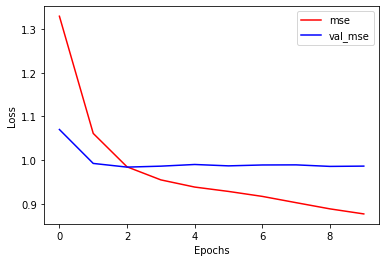

In [54]:

pyplot.plot(history.history['mse'],'r', label='mse')
pyplot.plot(history.history['val_mse'],'b', label='val_mse')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

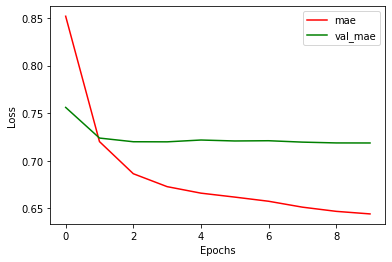

In [55]:
pyplot.plot(history.history['mae'],'r', label='mae')
pyplot.plot(history.history['val_mae'],'g', label='val_mae')

pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

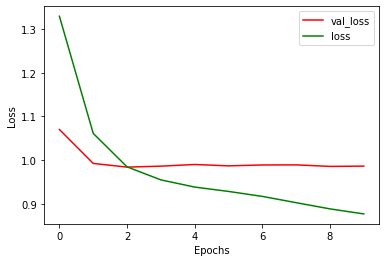

In [56]:
pyplot.plot(history.history['val_loss'],'r', label='val_loss')
pyplot.plot(history.history['loss'],'g', label='loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()